In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Check the first few rows of the dataset
print(df.head())

# Check the shape of the dataset (number of rows and columns)
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Get a summary of the dataset (mean, std, min, max, etc.)
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Preg

Data preprocessing

In [2]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Assuming there are no missing values based on the previous check
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


exploratory data analysis

In [13]:
df.corr() 

Pregnancies   Glucose  BloodPressure  SkinThickness   
Pregnancies                  1.000000  0.128213       0.208615       0.081770  \
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction   
Pregnancies               0.025047  0.021559                 -0.033523  \
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

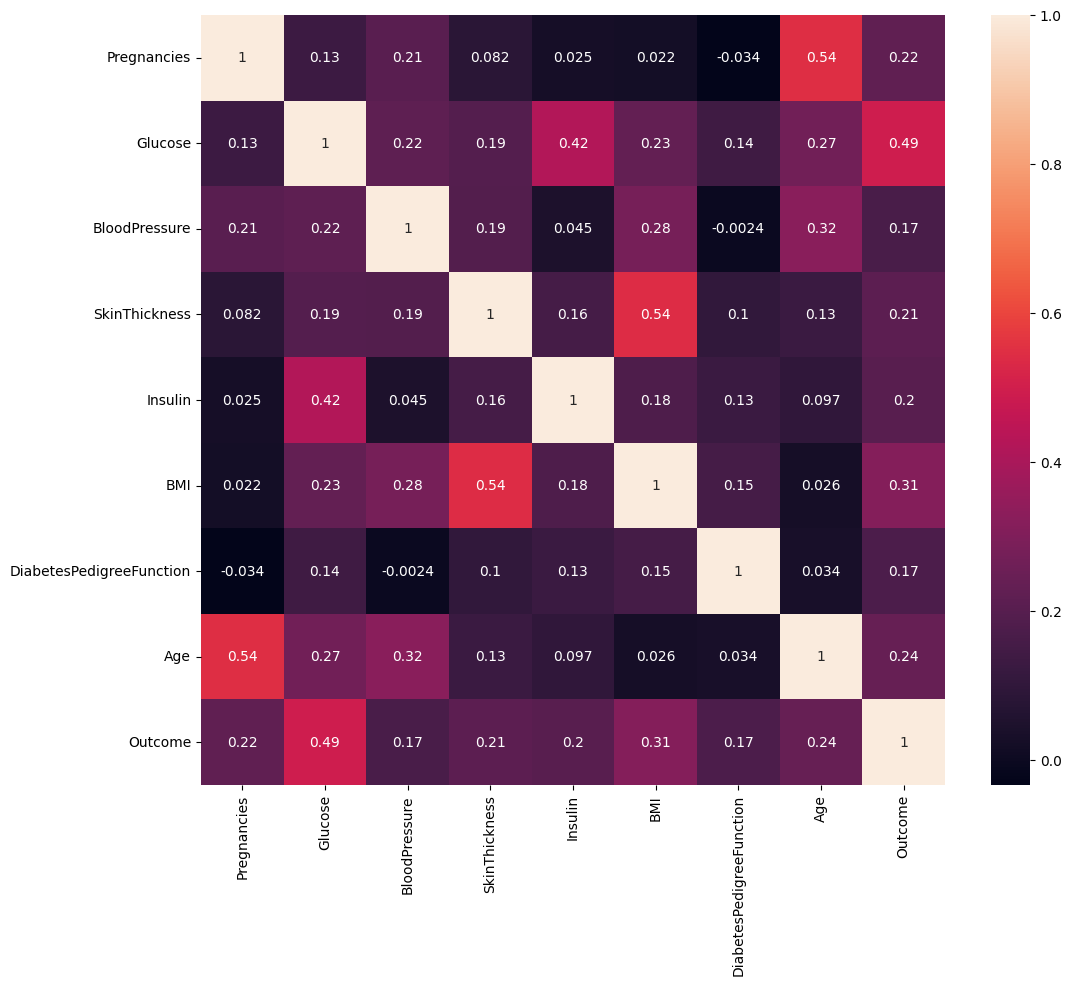

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
#A **heat map** is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.
#correlation
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)

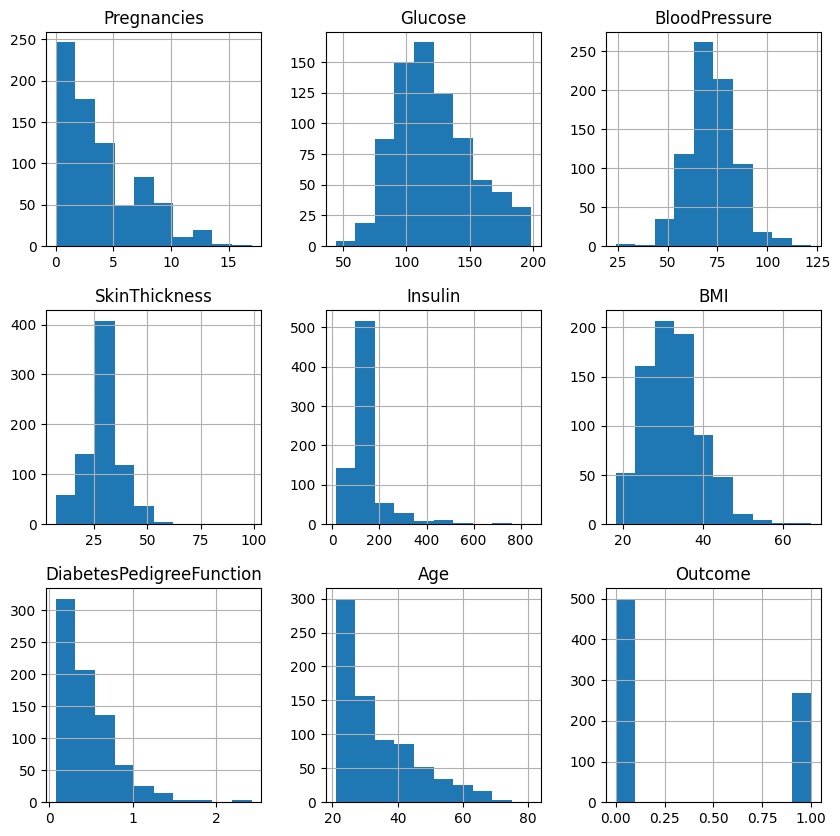

In [16]:
#Histogram
df.hist(figsize = (10,10))
plt.show()

c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been as

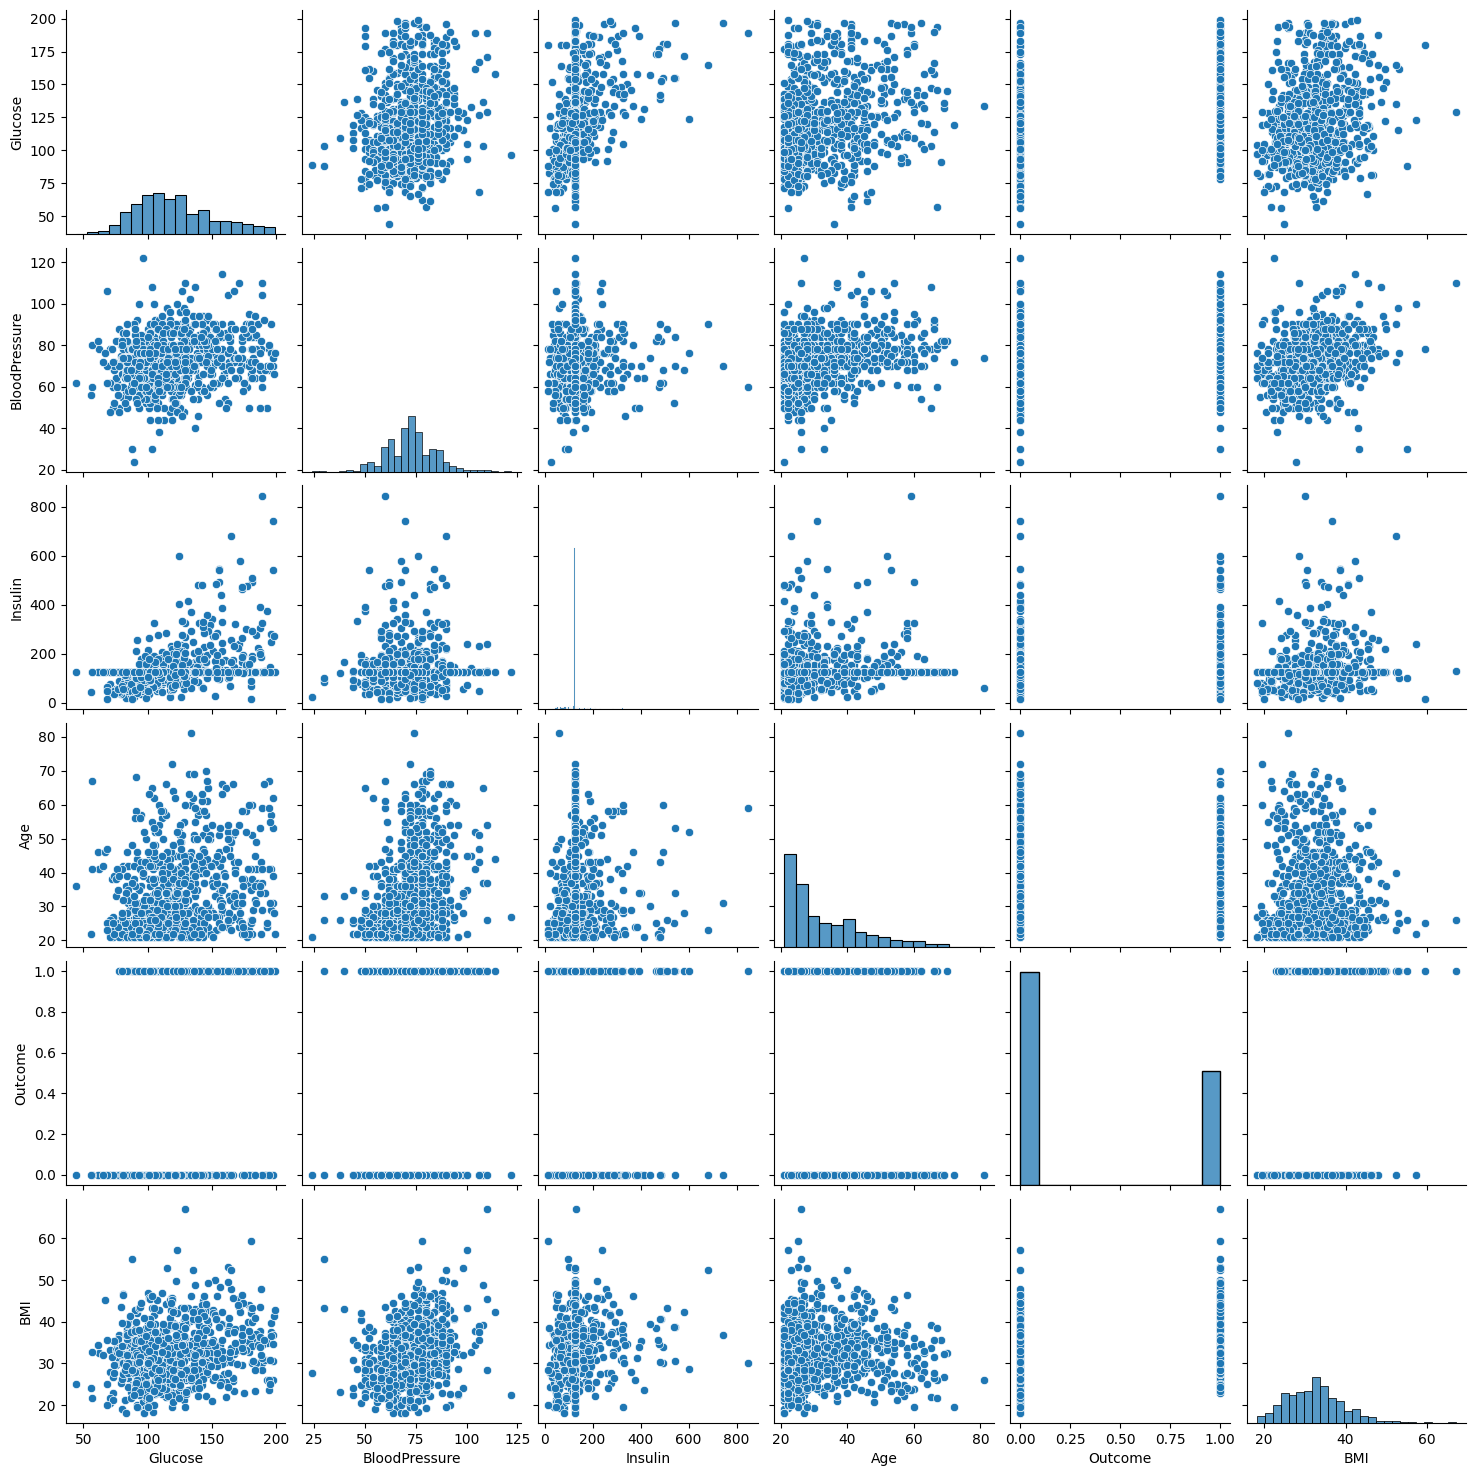

In [17]:
#pairplot
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(df[mean_col],palette = 'Accent')

<Axes: xlabel='BMI', ylabel='Glucose'>

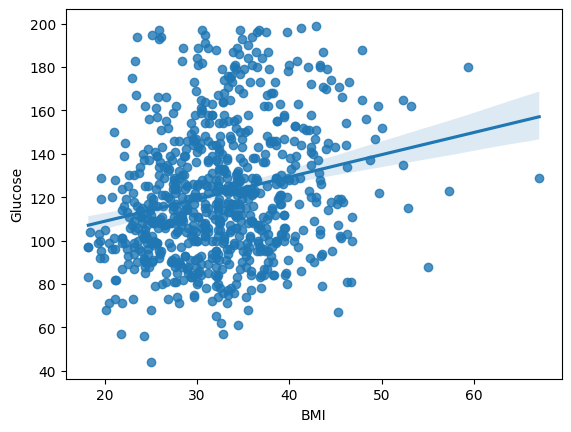

In [18]:
sns.regplot(x='BMI',y='Glucose', data=df)

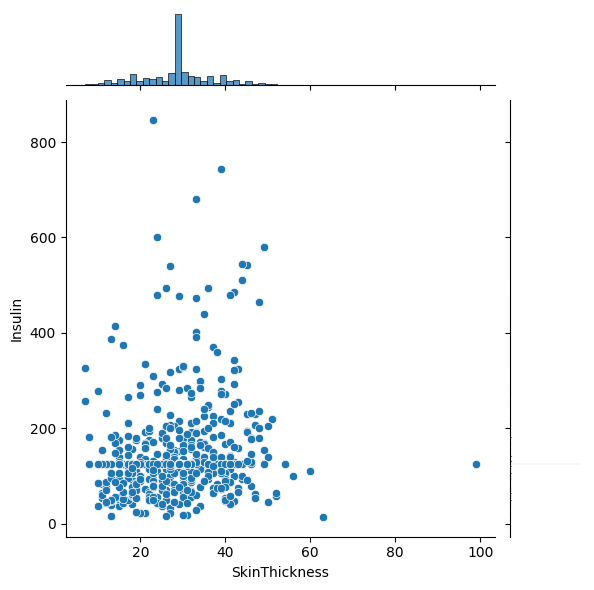

In [19]:
#scatterplot
sns.jointplot(x='SkinThickness', y='Insulin', data=df)

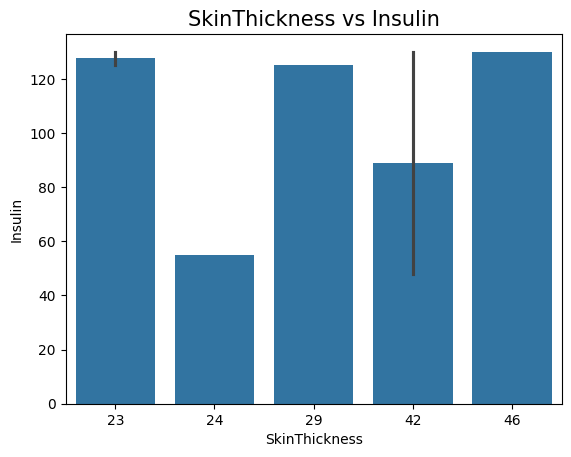

In [20]:
#barplot
sns.barplot(x='SkinThickness', y='Insulin', data=df[170:180])
plt.title("SkinThickness vs Insulin", fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

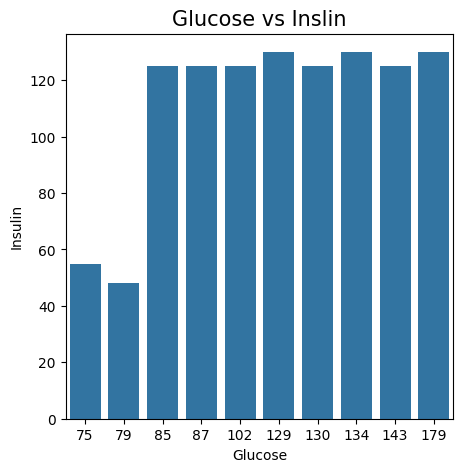

In [21]:
#barplot
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x='Glucose', y='Insulin', data=df[170:180])
plt.title("Glucose vs Inslin", fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

C:\Users\Bindu\AppData\Local\Temp\ipykernel_724\876682339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Outcome'],palette='Set1')


<Axes: xlabel='count', ylabel='Outcome'>

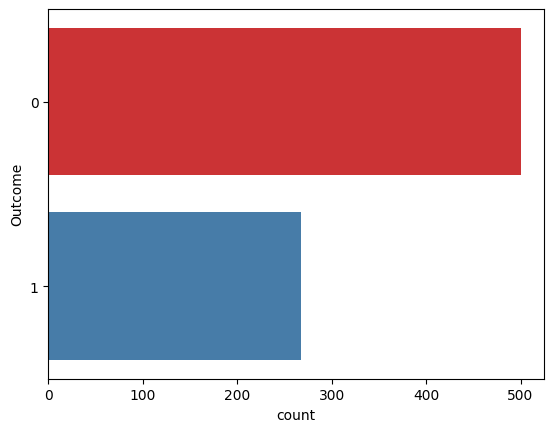

In [22]:
# Lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

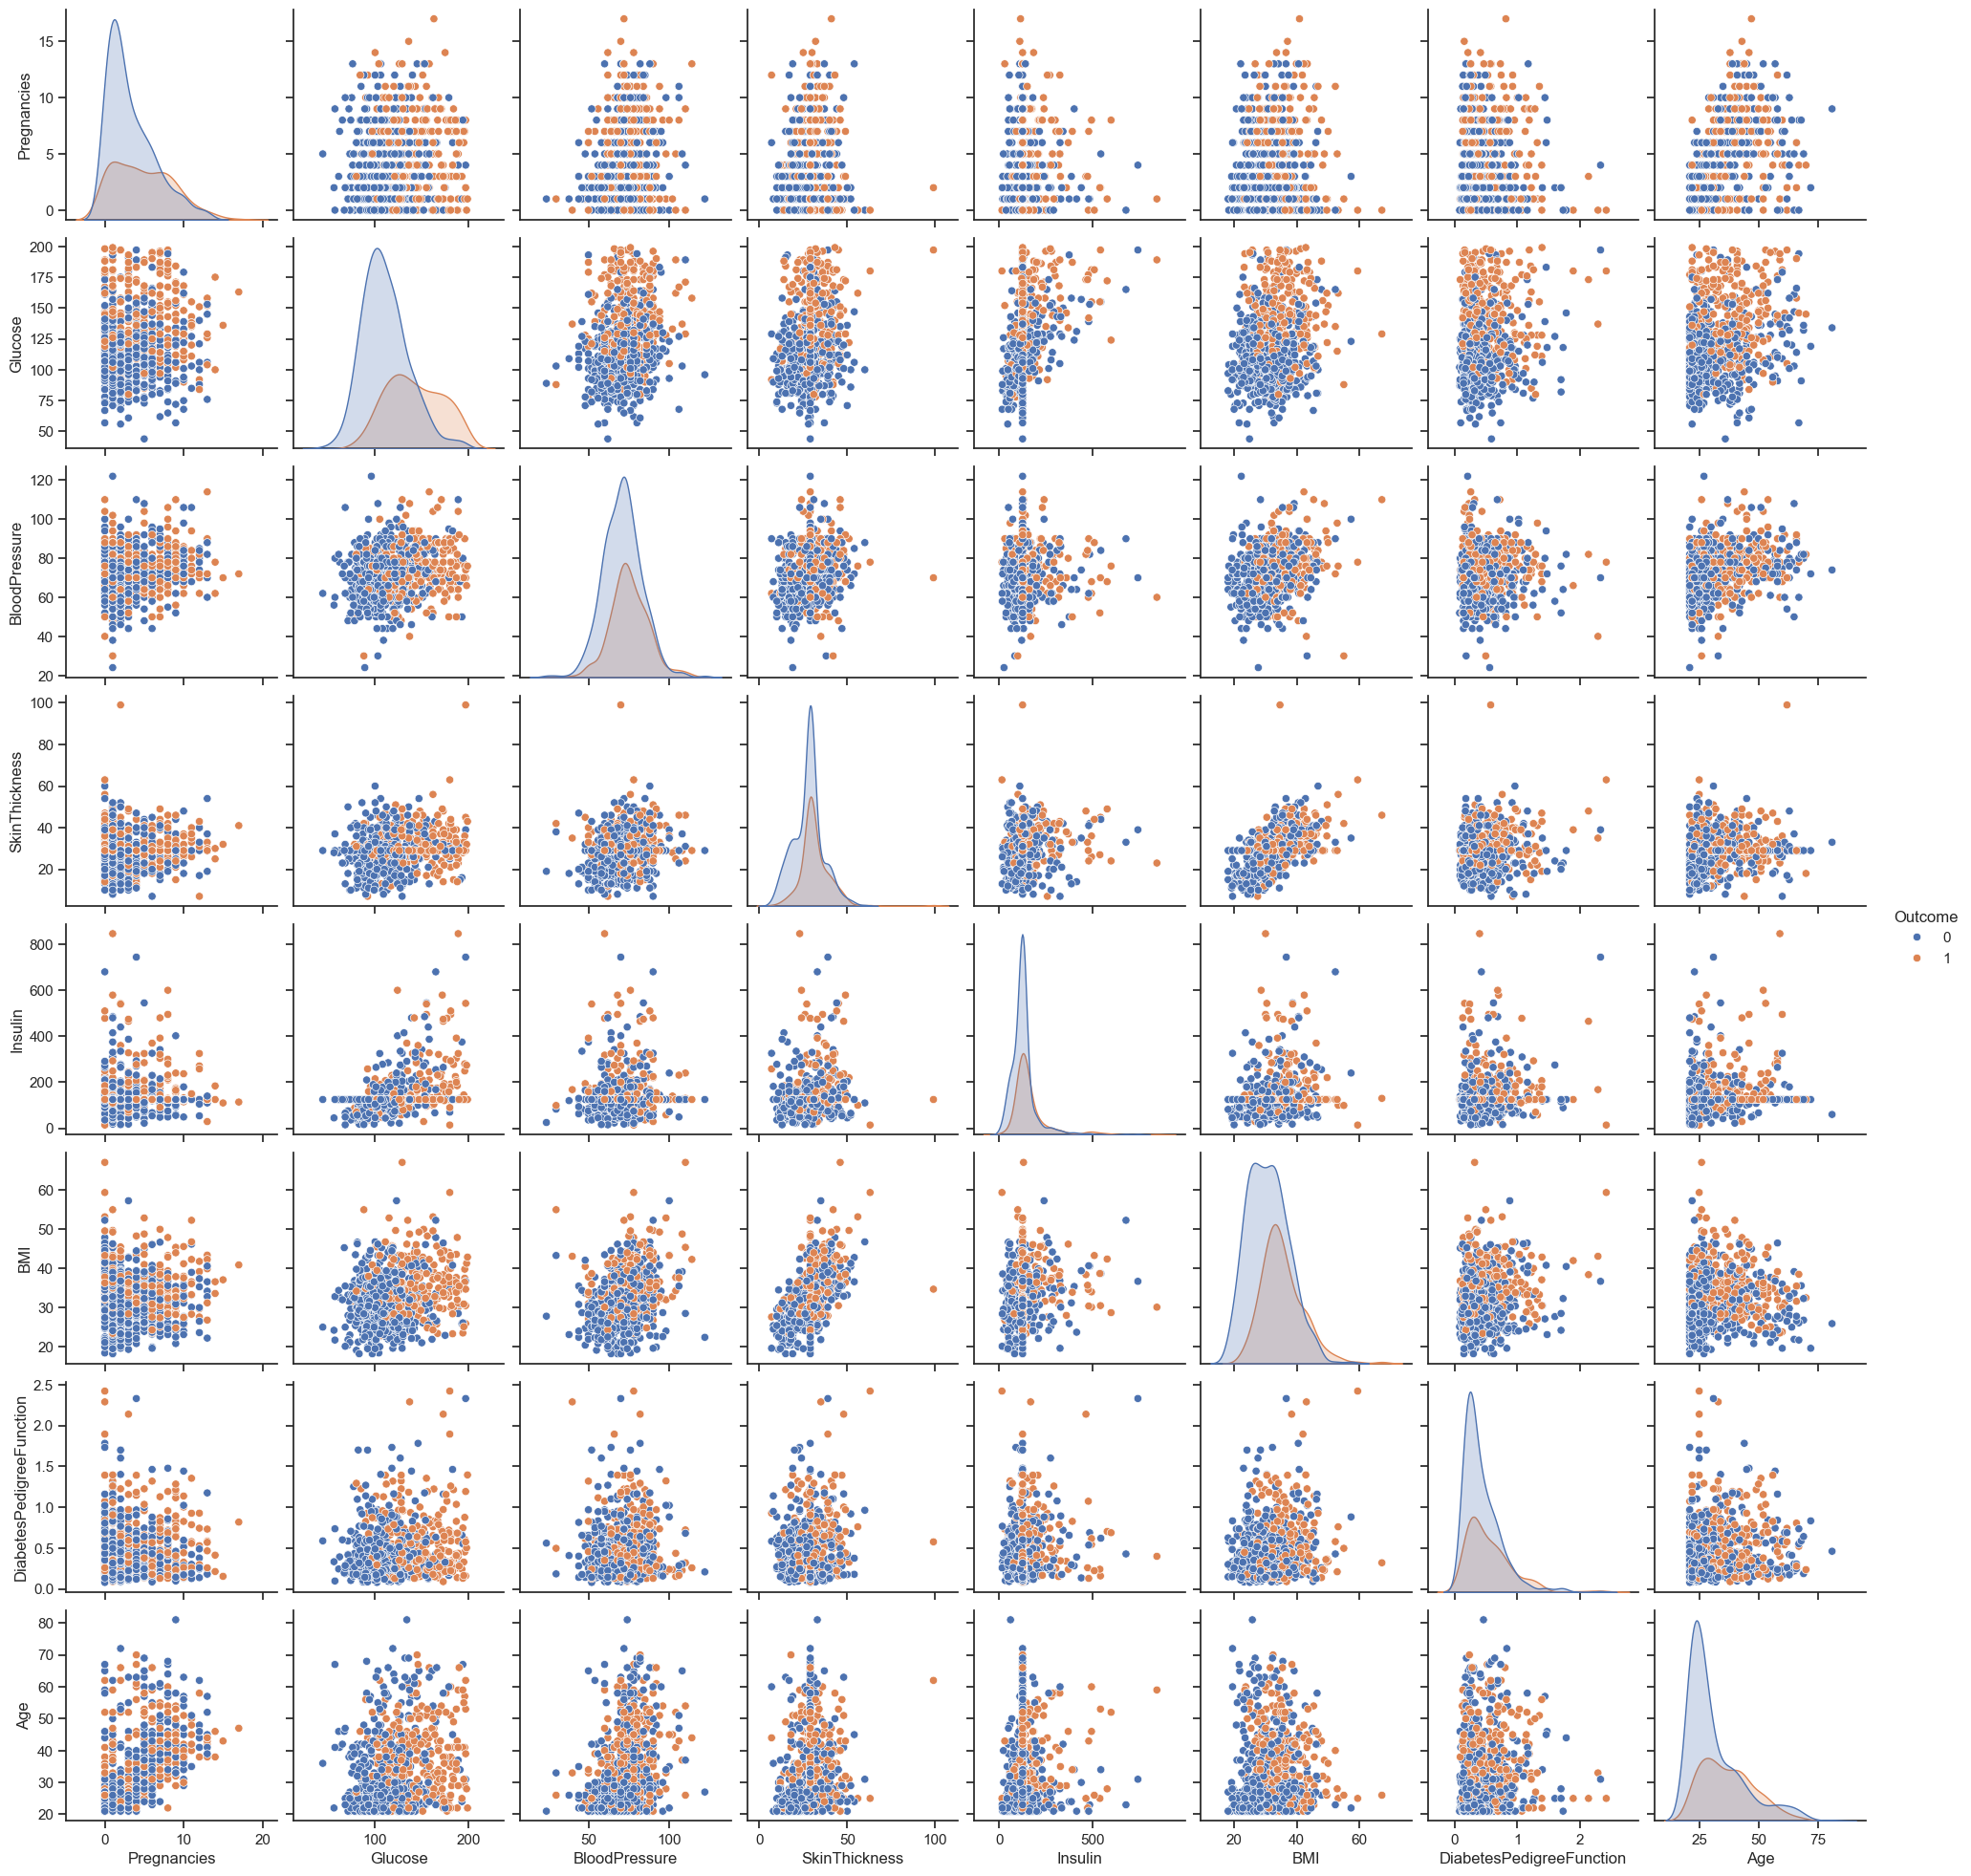

In [23]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<Axes: >

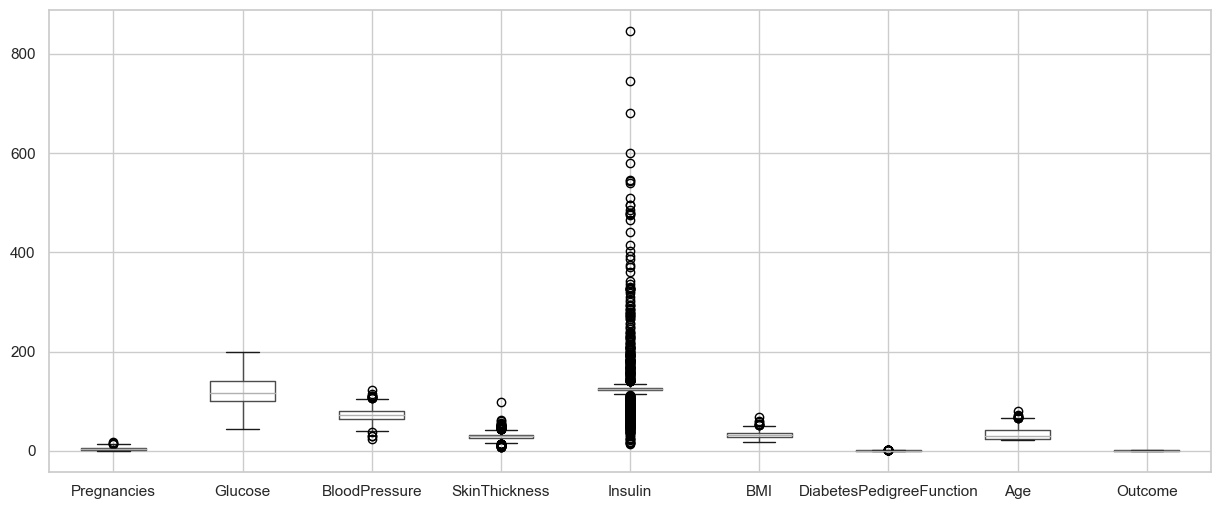

In [24]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [25]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                   1.00000
Glucose                      99.75000
BloodPressure                64.00000
SkinThickness                25.00000
Insulin                     121.50000
BMI                          27.50000
DiabetesPedigreeFunction      0.24375
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
Insulin                      5.7500
BMI                          9.1000
DiabetesPed

In [26]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((768, 9), (375, 9))

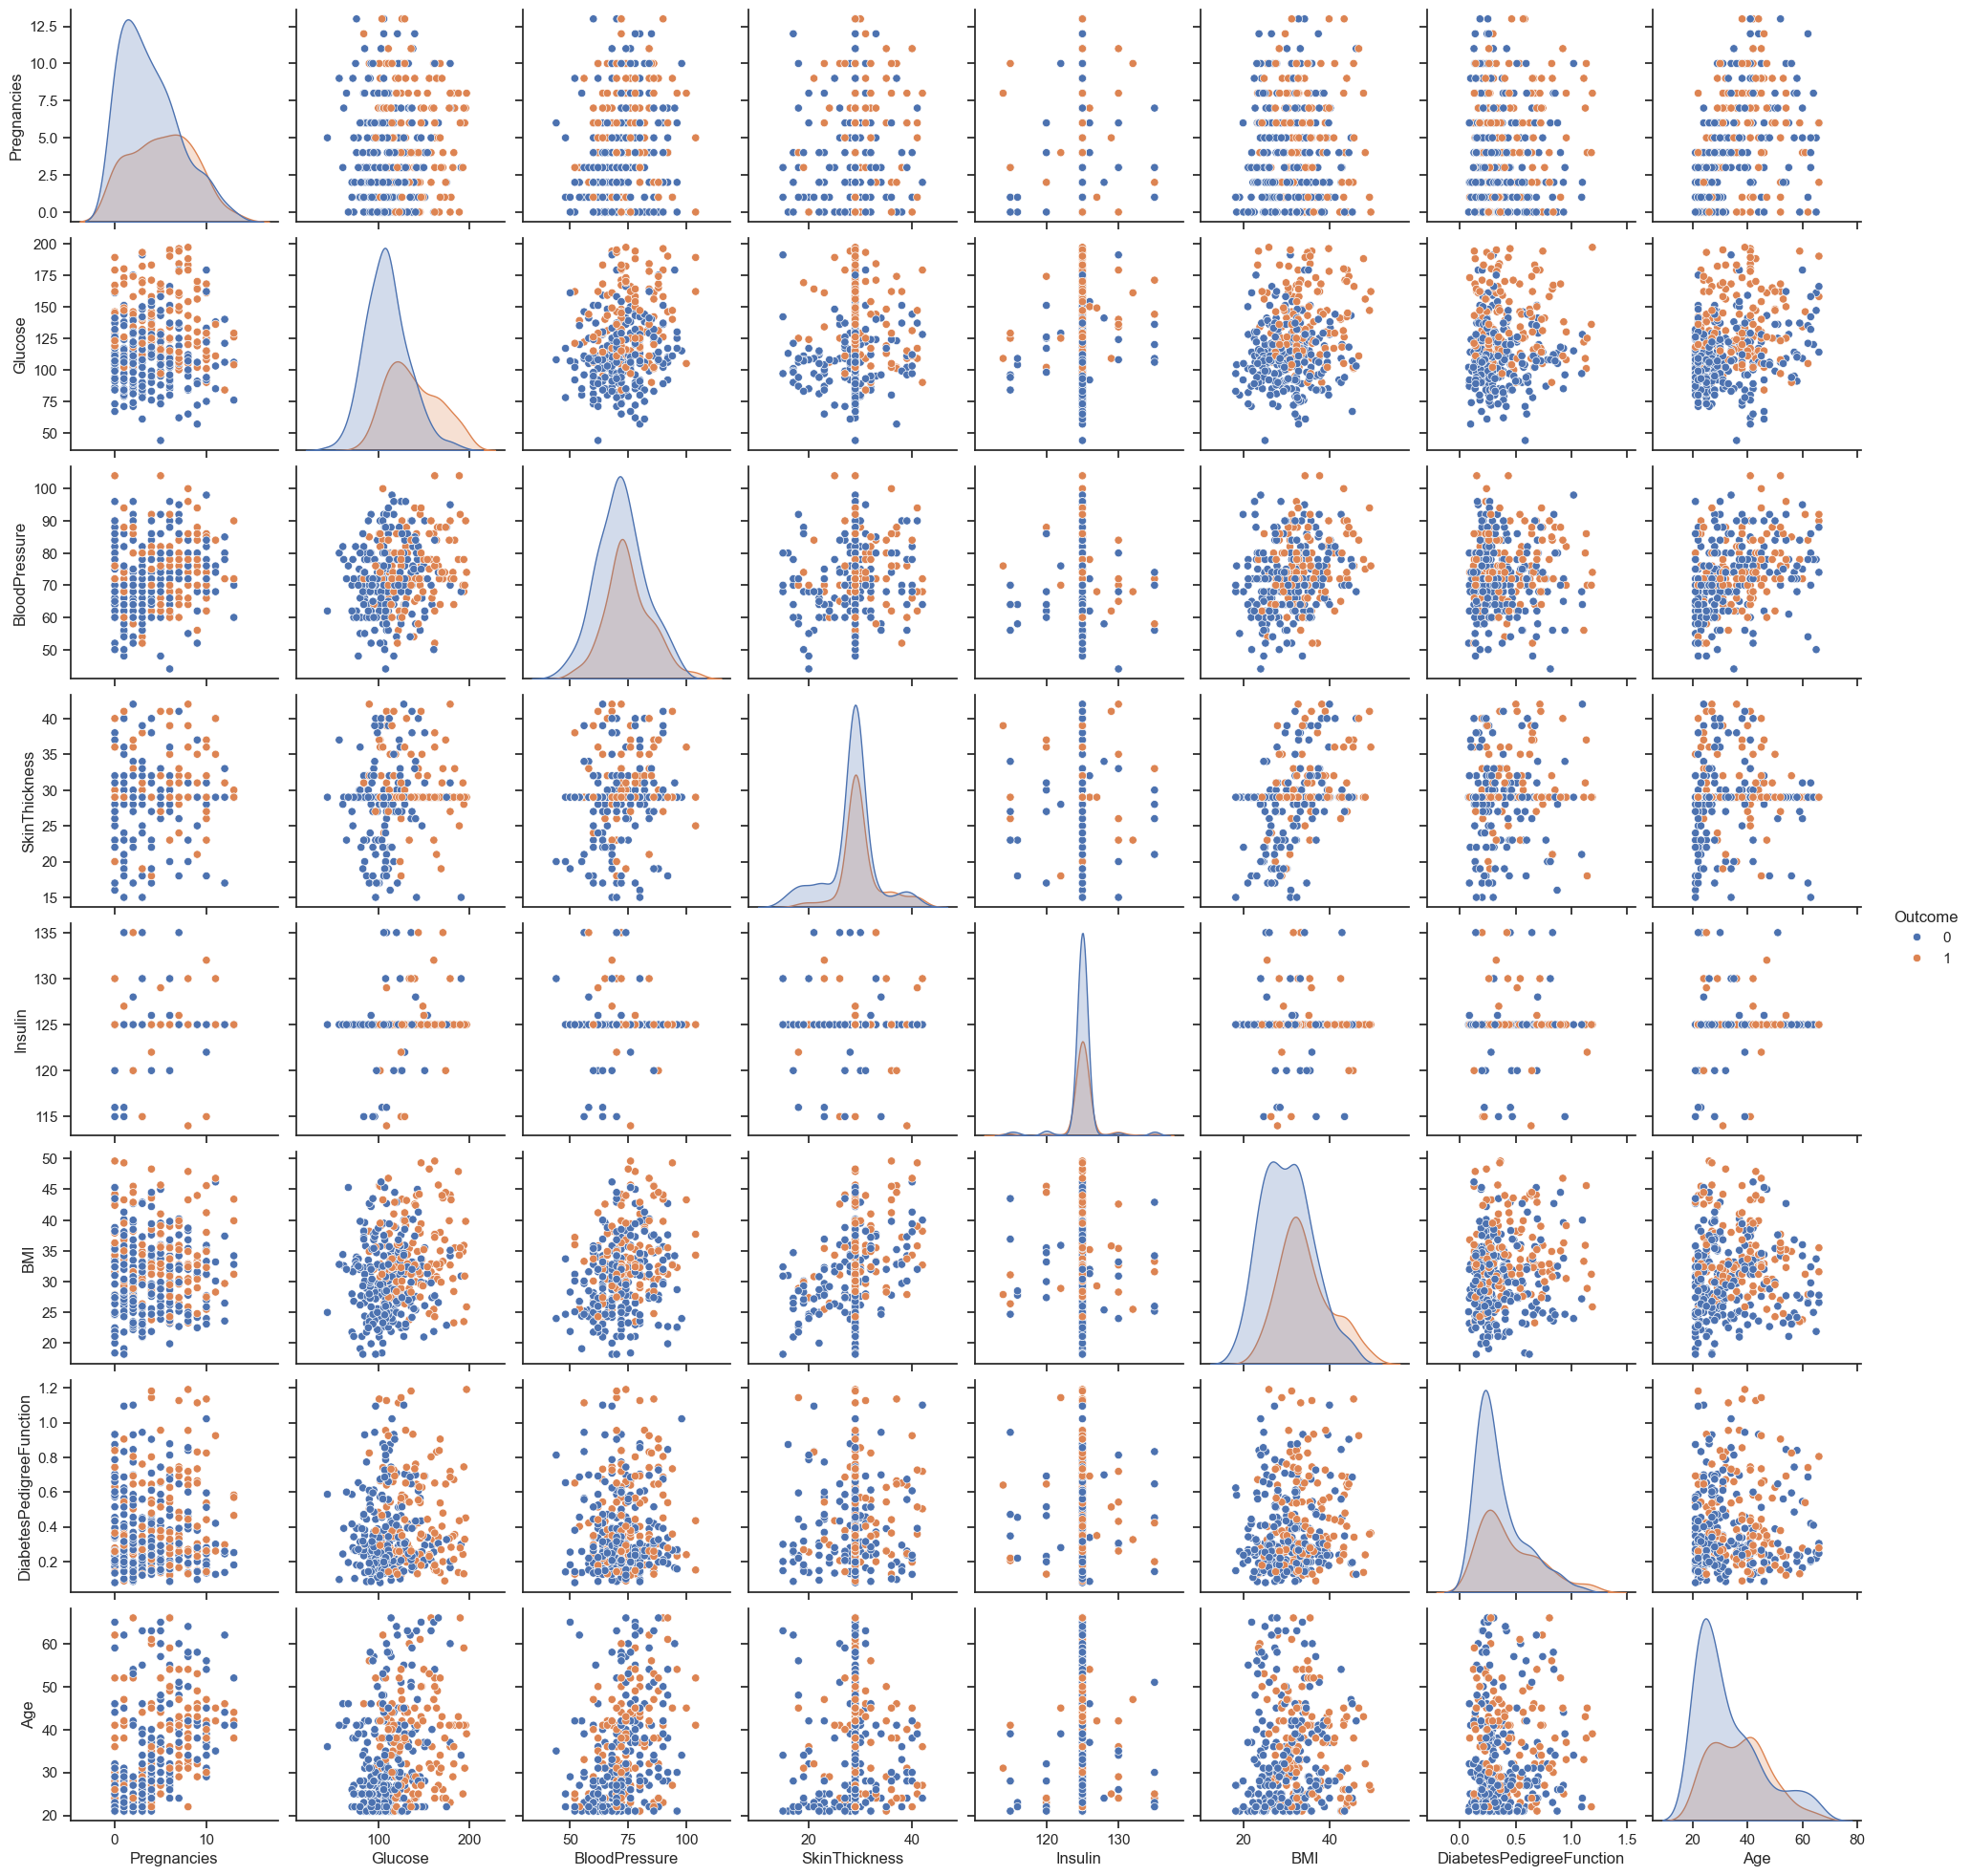

In [27]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

Text(0, 0.5, 'Count of Patients')

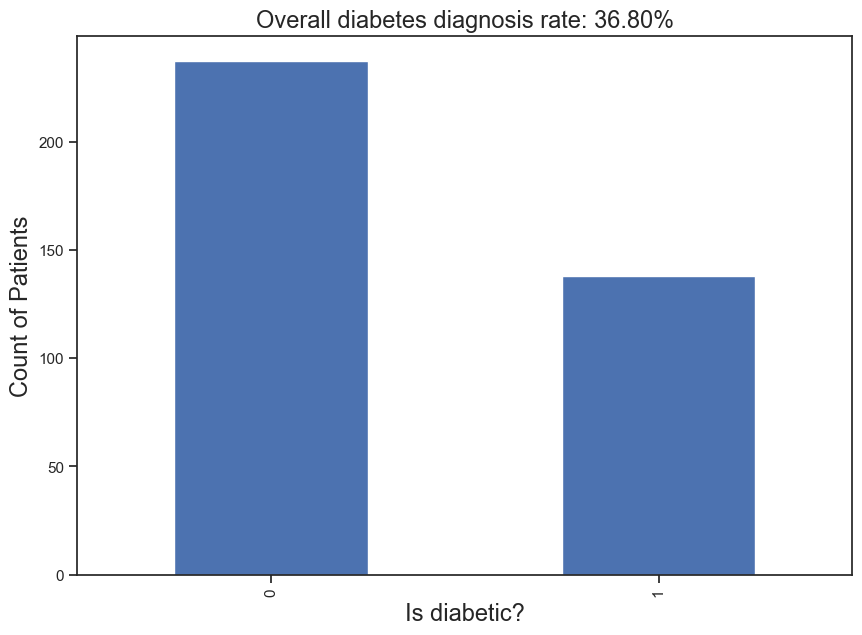

In [28]:
# visualizing distribution of Y feature (predictive variable)
plt.figure(figsize=(10,7))
df_out.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = df_out.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=17)
plt.xlabel('Is diabetic?', size=17)
plt.ylabel('Count of Patients', size=17)

eda ends

model selection

In [42]:
# Importing machine learning models and performance metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=25)

# Initialize the models
rf = RandomForestClassifier(random_state=25)
svm = SVC(random_state=25, probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the models
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict and calculate accuracy
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)
xgb_pred = xgb.predict(X_test)

print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}')
print(f'SVM Accuracy: {accuracy_score(y_test, svm_pred)}')
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}')


Random Forest Accuracy: 0.8571428571428571
SVM Accuracy: 0.8181818181818182
XGBoost Accuracy: 0.8571428571428571


c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


hyper paramater tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for RandomForest
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best parameters for Random Forest: {grid_rf.best_params_}')
rf_best_pred = grid_rf.predict(X_test)
print(f'Random Forest Accuracy after tuning: {accuracy_score(y_test, rf_best_pred)}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy after tuning: 0.8701298701298701


In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Parameters for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the training data
grid_xgb.fit(X_train, y_train)

# Print the best parameters and the best accuracy
print(f'Best Parameters: {grid_xgb.best_params_}')
print(f'Best Accuracy: {grid_xgb.best_score_}')

# Use the best estimator to predict on the test set
best_xgb = grid_xgb.best_estimator_
xgb_best_pred = best_xgb.predict(X_test)
accuracy = np.mean(xgb_best_pred == y_test)
print(f'XGBoost Tuned Accuracy: {accuracy}')


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.7}
Best Accuracy: 0.7583046606193307
XGBoost Tuned Accuracy: 0.8181818181818182


c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:36:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


next dhi

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Columns that might have incorrect zero values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with the median of each column
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.median(df[df[column] != 0][column]))

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if everything is processed correctly
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI   
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619  \
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


dL

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Load your dataset (replace 'your_dataset_path.csv' with your actual file path)
df = pd.read_csv('diabetes.csv')

# Preprocessing
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    df[column] = df[column].replace(0, np.median(df[df[column] != 0][column]))

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=25)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (Outcome: 0 or 1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
nn_loss, nn_acc = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {nn_acc}')


c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3709 - loss: 0.7366 - val_accuracy: 0.6187 - val_loss: 0.6747
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6554 - loss: 0.6671 - val_accuracy: 0.7770 - val_loss: 0.6413
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7498 - loss: 0.6214 - val_accuracy: 0.7698 - val_loss: 0.6002
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7754 - loss: 0.5678 - val_accuracy: 0.7554 - val_loss: 0.5440
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7817 - loss: 0.4995 - val_accuracy: 0.7626 - val_loss: 0.5092
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7706 - loss: 0.4461 - val_accuracy: 0.7554 - val_loss: 0.4963
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7715 - loss: 0.4475 - val_accuracy: 0.7554 - val_loss: 0.4956
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7866 - loss: 0.4375 - val_accuracy: 0.7626 - val_loss

after finetuning

In [35]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # Increase neurons
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Dropout of 30% to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a lower learning rate
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5804 - loss: 0.6733 - val_accuracy: 0.6043 - val_loss: 0.6018
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6953 - loss: 0.5668 - val_accuracy: 0.6906 - val_loss: 0.5262
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7332 - loss: 0.5228 - val_accuracy: 0.7482 - val_loss: 0.4994
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7397 - loss: 0.5054 - val_accuracy: 0.7482 - val_loss: 0.4965
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7660 - loss: 0.4542 - val_accuracy: 0.7482 - val_loss: 0.4990
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7865 - loss: 0.4554 - val_accuracy: 0.7410 - val_loss: 0.4929
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7497 - loss: 0.4811 - val_accuracy: 0.7410 - val_loss: 0.4918
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8004 - loss: 0.4265 - val_accuracy: 0.7410 - 

lstm

In [38]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'LSTM Model Accuracy: {accuracy}')

c:\Users\Bindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.6104 - loss: 0.6847 - val_accuracy: 0.7194 - val_loss: 0.6704
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7503 - loss: 0.6620 - val_accuracy: 0.7194 - val_loss: 0.6511
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7524 - loss: 0.6332 - val_accuracy: 0.7338 - val_loss: 0.6288
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7139 - loss: 0.6177 - val_accuracy: 0.7266 - val_loss: 0.6044
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7158 - loss: 0.5897 - val_accuracy: 0.7194 - val_loss: 0.5789
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7313 - loss: 0.5651 - val_accuracy: 0.7194 - val_loss: 0.5566
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7837 - loss: 0.5019 - val_accuracy: 0.7194 - val_loss: 0.5383
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7364 - loss: 0.5345 - val_accuracy: 0.7338 - val_l

fine tuning

In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the fine-tuned LSTM model
model = Sequential()

# Add LSTM layers with more units and dropout to prevent overfitting
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Fine-Tuned LSTM Model Accuracy: {accuracy}')


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.6695 - loss: 0.6894 - val_accuracy: 0.6187 - val_loss: 0.6820
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6795 - loss: 0.6739 - val_accuracy: 0.6187 - val_loss: 0.6625
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6695 - loss: 0.6466 - val_accuracy: 0.6115 - val_loss: 0.6174
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6691 - loss: 0.5838 - val_accuracy: 0.6835 - val_loss: 0.5463
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7402 - loss: 0.5030 - val_accuracy: 0.6906 - val_loss: 0.5146
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.4816 - val_accuracy: 0.7122 - val_loss: 0.5068
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7791 - loss: 0.4753 - val_accuracy: 0.7122 - val_loss: 0.5032
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7641 - loss: 0.4637 - val_accuracy: 0.7266